### This is the notebook for the second model (Random Forest)
#### Note: The over sampled data gave the best result in the first model

In [18]:
#Importing Libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
import pickle

In [3]:
df = pd.read_csv("winequality-red-clean.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Spliting

In [5]:
target = "quality"
X = df.drop(columns=target)
y = df[target]

print(f"X Shape is {X.shape}")
print(f"y Shape is {y.shape}")

X Shape is (1744, 11)
y Shape is (1744,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"The shape of X_train is {X_train.shape}")
print(f"The shape of X_test is {X_test.shape}")
print(f"The shape of y_train is {y_train.shape}")
print(f"The shape of y_test is {y_test.shape}")

The shape of X_train is (1395, 11)
The shape of X_test is (349, 11)
The shape of y_train is (1395,)
The shape of y_test is (349,)


In [7]:
#Over Sampling
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(2380, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.1,0.48,0.28,2.8,0.068,6.0,16.0,0.99682,3.24,0.53,10.3
1,6.9,0.67,0.06,2.1,0.080,8.0,33.0,0.99845,3.68,0.71,9.6
2,7.6,0.51,0.15,2.8,0.110,33.0,73.0,0.99550,3.17,0.63,10.2
3,6.4,0.40,0.23,1.6,0.066,5.0,12.0,0.99580,3.34,0.56,9.2
4,9.1,0.25,0.34,2.0,0.071,45.0,67.0,0.99769,3.44,0.86,10.2


### Model building

In [9]:
rfc = RandomForestClassifier(random_state=42)

In [8]:
param = {
    "n_estimators": range(25, 100, 25) ,
    "max_depth": range(10, 50, 10)
}
param

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 50, 10)}

In [11]:
model = GridSearchCV(
    rfc,
    param_grid=param,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [12]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [13]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.164398,0.043335,0.016004,0.004605,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.972689,0.966387,0.962185,0.970588,0.964286,0.967227,0.003896,12
1,0.371594,0.018798,0.027201,0.006046,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.974790,0.962185,0.966387,0.972689,0.964286,0.968067,0.004864,10
2,0.502747,0.021505,0.037601,0.006086,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.974790,0.966387,0.966387,0.968487,0.962185,0.967647,0.004117,11
3,0.181321,0.011949,0.013600,0.001743,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.976891,0.974790,0.972689,0.974790,0.978992,0.975630,0.002142,1
4,0.309398,0.008405,0.034600,0.024752,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.974790,0.970588,0.970588,0.981092,0.976891,0.974790,0.003986,4
5,0.557398,0.026897,0.029402,0.004883,20,75,"{'max_depth': 20, 'n_estimators': 75}",0.974790,0.972689,0.968487,0.972689,0.983193,0.974370,0.004864,7
6,0.219998,0.051106,0.012200,0.000980,30,25,"{'max_depth': 30, 'n_estimators': 25}",0.976891,0.974790,0.972689,0.974790,0.978992,0.975630,0.002142,1
7,0.409597,0.017715,0.022600,0.002871,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.974790,0.970588,0.970588,0.981092,0.976891,0.974790,0.003986,4
8,0.569397,0.060298,0.041401,0.013893,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.974790,0.972689,0.968487,0.972689,0.983193,0.974370,0.004864,7
9,0.161199,0.009765,0.012401,0.001019,40,25,"{'max_depth': 40, 'n_estimators': 25}",0.976891,0.974790,0.972689,0.974790,0.978992,0.975630,0.002142,1


In [14]:
# Best Model
model.best_params_

{'max_depth': 20, 'n_estimators': 25}

### The model above is the best model but creating a new model with this parameters is not need. Whenever we want to predict, the model will use the best model to make the prediction

In [16]:
# Check for the accuracy score
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.8997


#### There is an increase in the test accuracy compared to the decision tree model with a test accuracy score of 0.8854

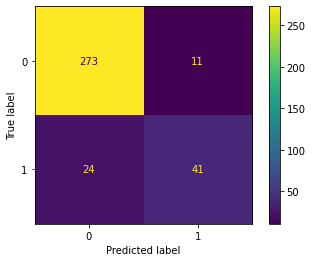

In [19]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

### Extracting five most importance features in the model

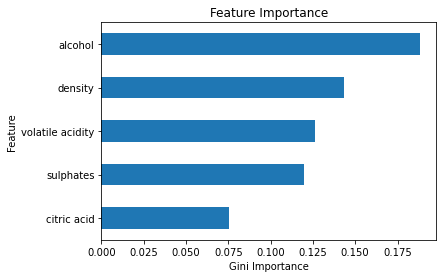

In [21]:
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.feature_importances_

feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.tail(5).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

### The five most important features are;
    1. Alcohol
    2. Density
    3. Volatile Acidity
    4. Sulphates
    5. Citric Acid

### Saving the best model

In [22]:
with open("Random-forest.pkl", "wb") as g:
    pickle.dump(model, g)